# Welcome

This short tutorial will look at data about the 2016 Colombian peace referendum on voting results and the number of rebel attacks during the height of insurgency in the 2016 Colombian peace referendum. Tasks include summing the totals of certain variables, calculating the means, and plotting histograms and scatter plots to generate bivariate correlations.

To analyze the effect of voting results and the number of rebel attacks during the height of insurgency, first, calculate the vote share of the NO vote. This is the NO vote share of all ballots cast. Call this variable NO_VS. Second, calculate departmental turnout. This is the sum of all ballots cast divided by the number of registered voters in the municipality. Name this variable DEPT_TO. Report the mean for each variable.

Make sure to install and run the required libraries. In this example, **tidyverse** will be used to some data wrangling tasks and **readxl** will help to import the xls data file. Furthermore, make sure to change the file path to where the file is saved before importing.

In [23]:
library(tidyverse)
library(readxl)

dept_data <- read_xls("C:/Users/Jenny/dept_data.xls") # change file path

     dept                YES                NO               REG         
 Length:33          Min.   :    974   Min.   :   1013   Min.   :   4017  
 Class :character   1st Qu.:  39197   1st Qu.:  36754   1st Qu.: 263184  
 Mode  :character   Median : 124035   Median : 134604   Median : 760280  
                    Mean   : 206962   Mean   : 212674   Mean   :1106022  
                    3rd Qu.: 215116   3rd Qu.: 191489   3rd Qu.:1154805  
                    Max.   :1423612   Max.   :1114933   Max.   :5547172  
    RV_EXPOS          NO_VS           DEPT_TO      
 Min.   :   0.0   Min.   :0.2024   Min.   :0.1885  
 1st Qu.: 133.0   1st Qu.:0.4013   1st Qu.:0.3187  
 Median : 371.0   Median :0.5563   Median :0.3730  
 Mean   : 518.5   Mean   :0.5112   Mean   :0.3819  
 3rd Qu.: 801.0   3rd Qu.:0.6013   3rd Qu.:0.4067  
 Max.   :2560.0   Max.   :0.8329   Max.   :0.8055  

[1] 0.5111584

[1] 0.381872

Now, use **mutate** to create a new column for the NO vote share and the departmental turnout. Name these variables NO_VS and DEPT_TO, respectively.

In [ ]:
dept_data_new <- mutate(dept_data,
                    "NO_VS" = dept_data$NO/(dept_data$YES + dept_data$NO),
                    "DEPT_TO" = (dept_data$YES + dept_data$NO)/dept_data$REG)

summary(dept_data_new)

dept_data1 <- dept_data_new %>%
  group_by(NO_VS, DEPT_TO) %>%
  summarize()

mean(dept_data1$NO_VS)
mean(dept_data1$DEPT_TO)

Plotting a histogram can be useful to visualize share of NO votes within each department. **ggplot** can be a useful too to create and customize the histogram for each variable in which the ggplot syntax allows layering of plots, graphs, or maps.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

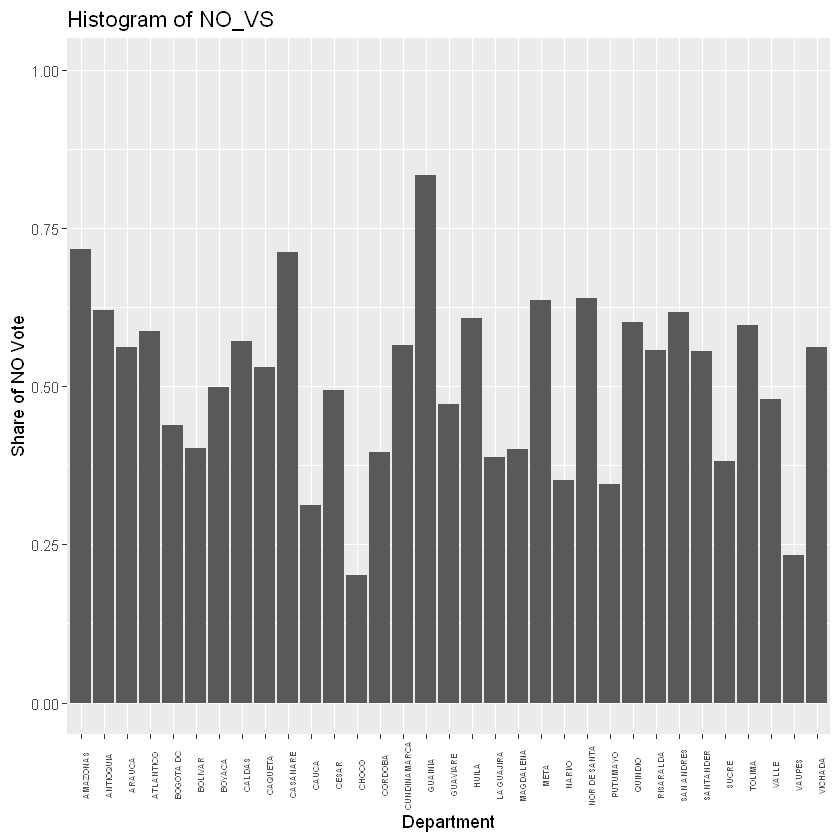

In [20]:
# Histogram for NO_VS

library(ggplot2)

ggplot(data=dept_data, aes(x= dept, y= NO_VS)) + 
  geom_histogram(binwidth = 5, stat = "identity") + 
  labs(title="Histogram of NO_VS", x="Department", y="Share of NO Vote") + 
  ylim(c(0,1)) +
  theme(axis.text.x = element_text(face="bold", size=5, angle=90))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

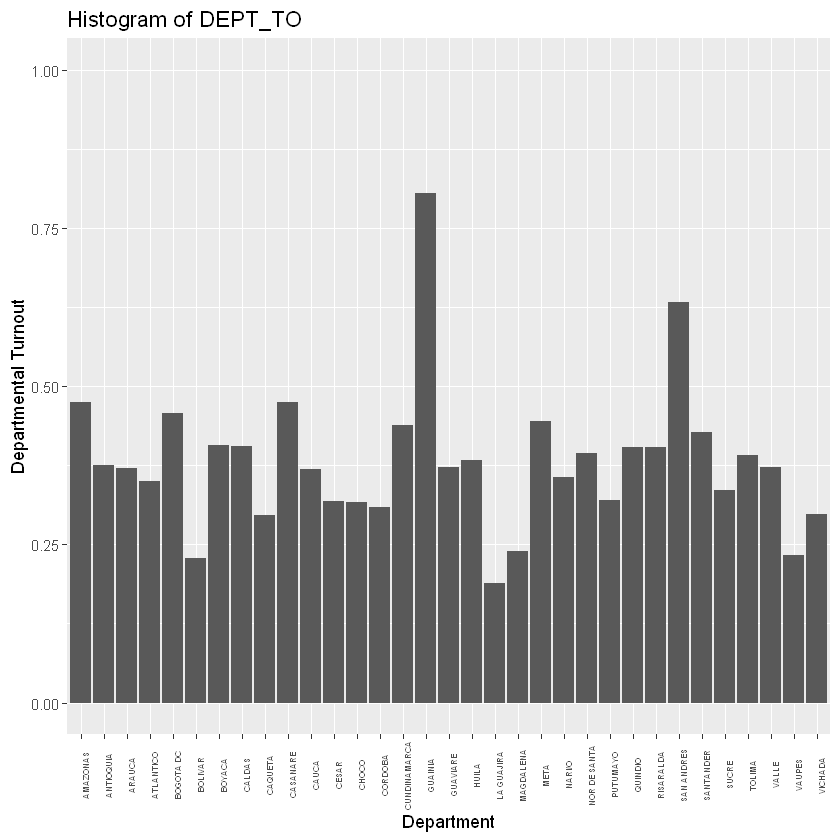

In [21]:
# Histogram for DEPT_TO

ggplot(data=dept_data_new, aes(x= dept, y= DEPT_TO)) + 
  geom_histogram(binwidth = 5, stat = "identity") + 
  labs(title="Histogram of DEPT_TO", x="Department", y="Departmental Turnout") + 
  ylim(c(0,1)) +
  theme(axis.text.x = element_text(face="bold", size=5, angle=90))

Now let's look at some correlations with a simple scatter plot analysis. Report the bivariate correlation between NO_VS and the variable measuring exposure to rebel violence during the height of the insurgency (RV_EXPOS). Then report the bivariate correlation between DEPT_TO and RV_EXPOS. Of course regression analysis can be used as well.

ggplot can be used again and shows the variability of functions for this command.


	Pearson's product-moment correlation

data:  dept_data_new$NO_VS and dept_data_new$RV_EXPOS
t = 0.36633, df = 31, p-value = 0.7166
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2840580  0.3999479
sample estimates:
       cor 
0.06565348 


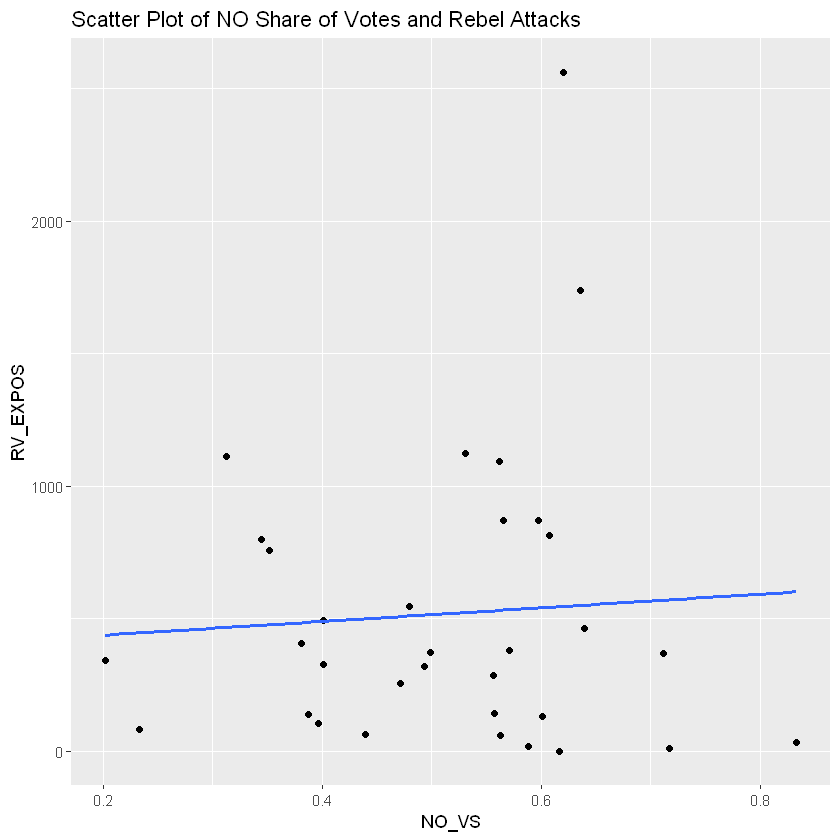

In [40]:
# Create a scattor plot and generate regression line to compare NO_VS and RV_EXPOS variables

ggplot(data=dept_data_new, aes(x= NO_VS, y= RV_EXPOS)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = F) +
  labs(x="NO_VS", y="RV_EXPOS") +
  ggtitle("Scatter Plot of NO Share of Votes and Rebel Attacks")

cor.test(dept_data_new$NO_VS, dept_data_new$RV_EXPOS,
         method = "pearson")

Repeat the scatter plot analysis for departmental turnout and rebel attacks.


	Pearson's product-moment correlation

data:  dept_data_new$DEPT_TO and dept_data_new$RV_EXPOS
t = -0.4989, df = 31, p-value = 0.6214
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4196972  0.2620919
sample estimates:
        cor 
-0.08924748 


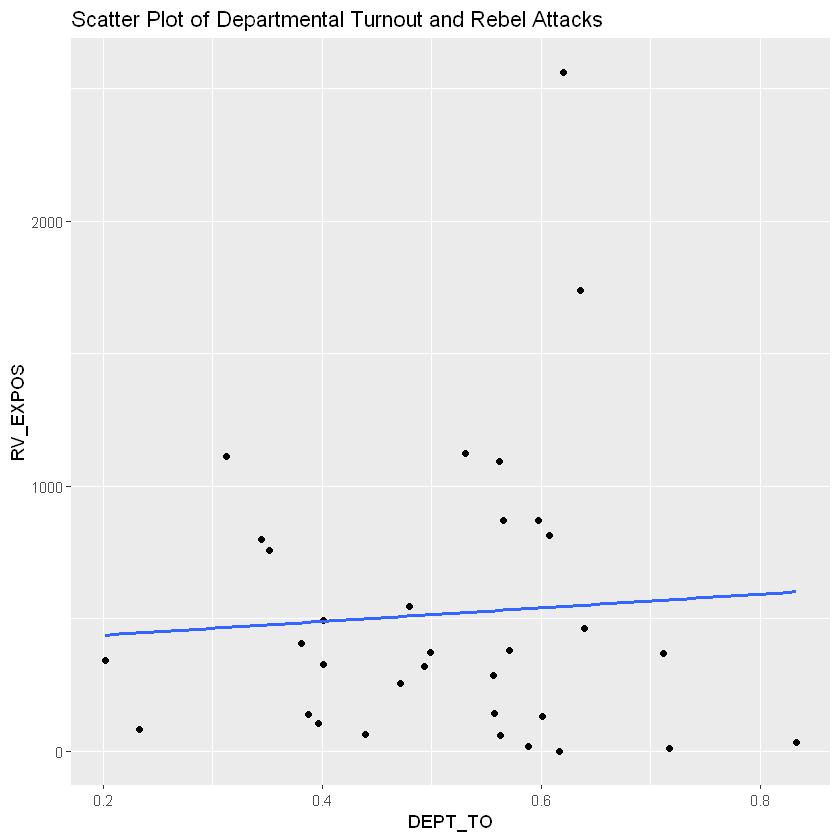

In [41]:
# Create scatter plot to compare the correlation between DEPT_TO and RV_EXPOS

ggplot(data=dept_data_new, aes(x= NO_VS, y= RV_EXPOS)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = F) +
  labs(x="DEPT_TO", y="RV_EXPOS") + 
  ggtitle("Scatter Plot of Departmental Turnout and Rebel Attacks")

cor.test(dept_data_new$DEPT_TO, dept_data_new$RV_EXPOS,
         method = "pearson")